In [18]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "datasets/diabetes.csv")
df = pd.read_csv(path_file, header=0)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
print('Numbers of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ': ' + str(missing_rows))

Numbers of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [22]:
# Padronização dos dados
import numpy as np

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

print('Numbers of rows with 0 values for each variable')
for col in df.columns:
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ': ' + str(missing_rows))

Numbers of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [23]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [24]:
from sklearn import preprocessing

df_scaled = preprocessing.scale(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# print('Numbers of rows with 0 values for each variable')
# for col in df_scaled.columns:
#     missing_rows = df_scaled.loc[df_scaled[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [25]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled
df.describe().loc[['mean', 'std', 'max', 'min'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00
min,1.14,2.55,4.0,2.52,1.67,2.08,1.19,1.04,0.00


In [26]:
# print('Numbers of rows with 0 values for each variable')
# for col in df.columns:
#     missing_rows = df.loc[df[col] == 0].shape[0]
#     print(col + ': ' + str(missing_rows))

In [27]:
X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
from sklearn import preprocessing

history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6927 - loss: 0.6224 - val_accuracy: 0.6992 - val_loss: 0.6177
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7297 - loss: 0.5829 - val_accuracy: 0.7073 - val_loss: 0.5904
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7525 - loss: 0.5280 - val_accuracy: 0.6748 - val_loss: 0.5711
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7254 - loss: 0.5249 - val_accuracy: 0.6829 - val_loss: 0.5586
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7479 - loss: 0.5099 - val_accuracy: 0.6829 - val_loss: 0.5470
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7545 - loss: 0.4961 - val_accuracy: 0.7154 - val_loss: 0.5396
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7615 - loss: 0.4830 - val_accuracy: 0.7154 - val_loss: 0.5338
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7327 - loss: 0.5128 - val_accuracy: 0.7236 - val_loss:

In [31]:
scores = model.evaluate(X_train, y_train)
print('Training Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_val, y_val)
print('Validation Accuracy: %.2f%%\n' % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print('Testing Accuracy: %.2f%%\n' % (scores[1]*100))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9013 - loss: 0.2173
Training Accuracy: 90.43%

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7034 - loss: 0.6247
Validation Accuracy: 68.29%

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7832 - loss: 0.4993 
Testing Accuracy: 78.57%



In [32]:
y_test_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


Text(0, 0.5, 'True Positive Rate')

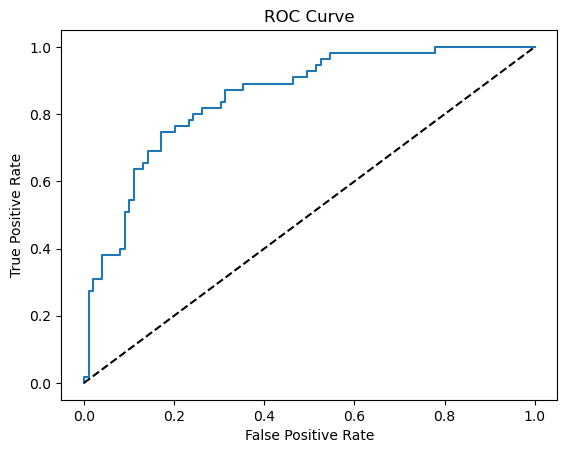

In [33]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

FPR, TPR, _ = roc_curve(y_test, y_test_pred)
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')